In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train=pd.read_csv('train_loan.csv')
test=pd.read_csv('test_loan.csv')

In [5]:
train_original=train.copy()
test_original=test.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.shape

(614, 13)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Univariate Analysis

<AxesSubplot:>

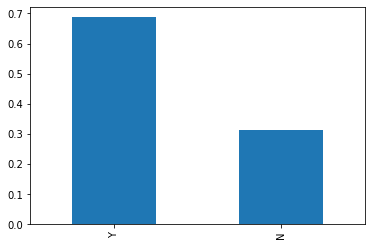

In [14]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecation

<AxesSubplot:title={'center':'Dependents'}>

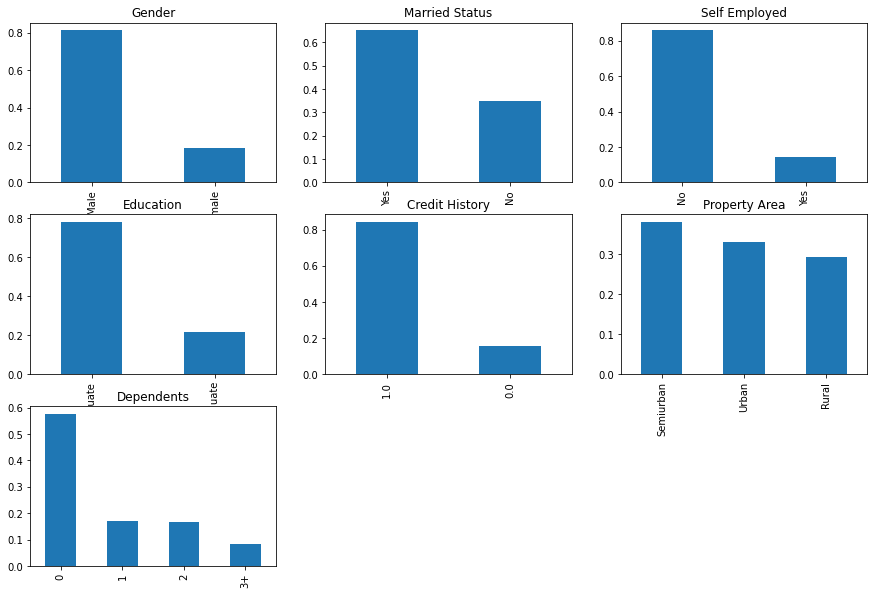

In [21]:
# For Nominal and Ordinal Variables
plt.figure(1)
plt.subplot(331)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Gender')
plt.subplot(332)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(15,10), title='Married Status')
plt.subplot(333)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Self Employed')
plt.subplot(334)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Education')
plt.subplot(335)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Credit History')
plt.subplot(336)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Property Area')
plt.subplot(337)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Dependents')

In [18]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

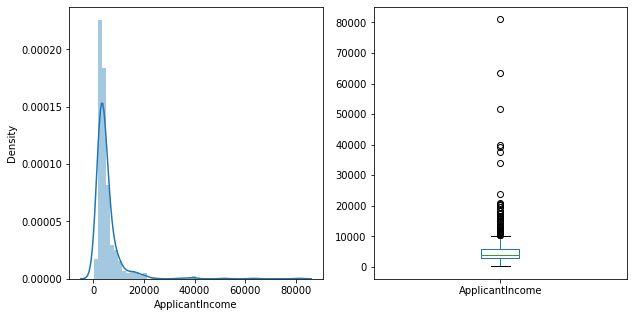

In [28]:
# For numerical data
plt.figure(2)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(10,5))

# This is not normally distributed
# Boxplot depicts a lot of outliers

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

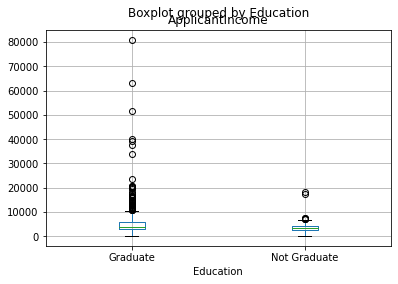

In [31]:
train.boxplot(column='ApplicantIncome', by='Education')
# Higher number of graduates with very high incomes, which are appearing to be outliers

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

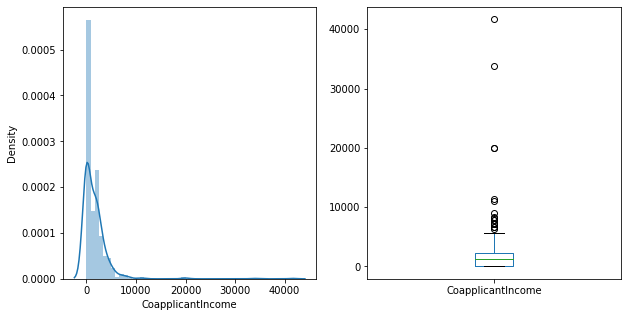

In [33]:
plt.figure(2)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,5))
# Similar to Applicant Income

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kush/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

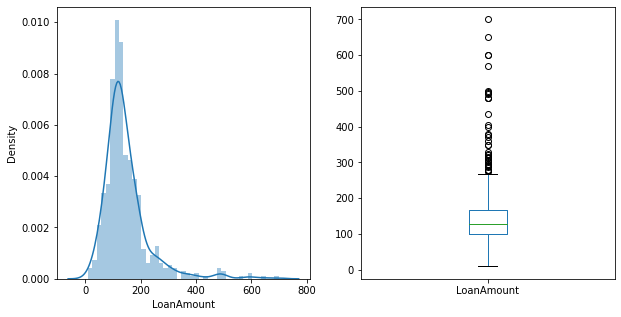

In [35]:
plt.figure(2)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(10,5))
# Lot of outliers but distribution is fairly normal

# Bivariate Analysis - Categorical Variable v/s Target Variable

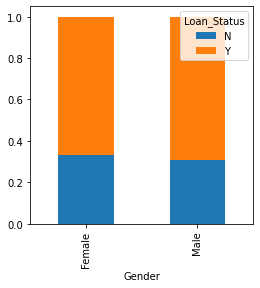

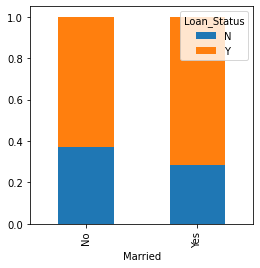

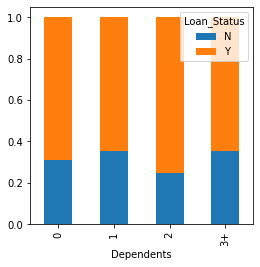

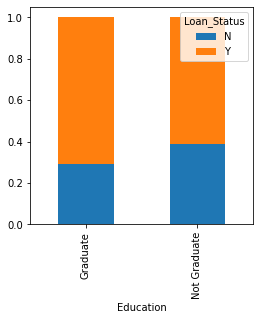

In [46]:
Gender= pd.crosstab(train['Gender'],train['Loan_Status'])
Married= pd.crosstab(train['Married'],train['Loan_Status'])
Dependents= pd.crosstab(train['Dependents'],train['Loan_Status'])
Education= pd.crosstab(train['Education'],train['Loan_Status'])

#plt.subplot(221)
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
#plt.subplot(222)
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
#plt.subplot(223)
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
#plt.subplot(224)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

# Numerical Independent Variable v/s Target Variable

Text(0, 0.5, 'Percentage')

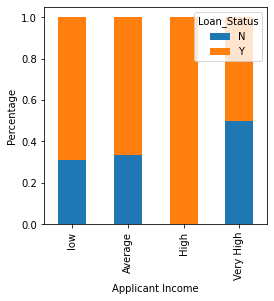

In [53]:
#Applicant Income
bins=[0,20000,40000,60000,81000]
group=['low','Average','High','Very High']
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_Bin= pd.crosstab(train['Income_Bin'],train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

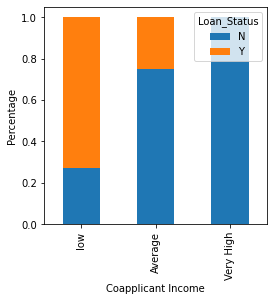

In [56]:
#Coapplicant Income
bins=[0,10000,20000,30000,42000]
group=['low','Average','High','Very High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_Bin= pd.crosstab(train['Coapplicant_Income_Bin'],train['Loan_Status'])
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

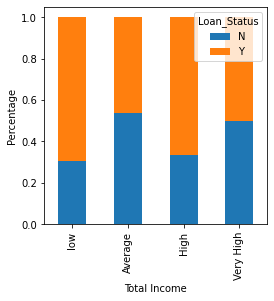

In [57]:
#Total Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,20000,40000,60000,81000]
group=['low','Average','High','Very High']
train['Total_Income_Bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_Bin= pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

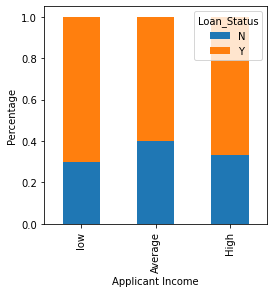

In [61]:
#Loan Amount
bins=[0,250,450,700]
group=['low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_Bin= pd.crosstab(train['LoanAmount_Bin'],train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

In [64]:
train=train.drop(['Income_Bin','Coapplicant_Income_Bin','Total_Income','Total_Income_Bin','LoanAmount_Bin'],axis=1)

In [68]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [72]:
train['Dependents'].replace('3+',3,inplace=True)

In [74]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [75]:
matrix=train.corr()

<AxesSubplot:>

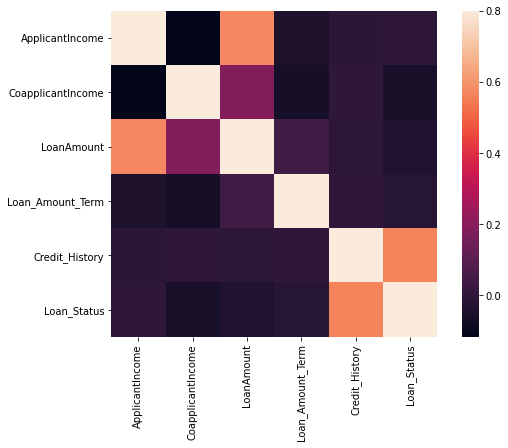

In [79]:
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True)
#Most correlated variables - Loan Amount and Applicant Income ; Credit History and Loan Status
# Coapplicant Income and Loan Amount are also correlated

# Missing Value Imputation

In [85]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
# Replacing Null Categorical Values with Mode and Numerical Values with Median
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [89]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        0
dtype: int64

In [90]:
# Replacing Null Categorical Values with Mode and Numerical Values with Median
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

# Outlier Treatment

<AxesSubplot:>

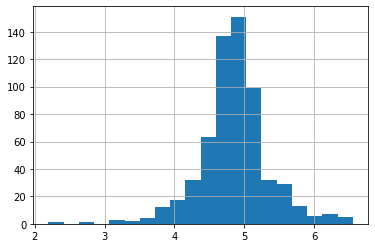

In [91]:
# Log Transformation can help to make the distribution Normal
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

# Model Building

In [92]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [93]:
y=train['Loan_Status']
x=train.drop('Loan_Status',axis=1)

In [94]:
#Convrting Categorical Variables into Dummies
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [98]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [100]:
pred_cv=model.predict(x_cv)

In [101]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [102]:
pred_test=model.predict(test)

In [106]:
submission=pd.read_csv('submission_loan.csv')

In [107]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [108]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [109]:
pd.DataFrame(submission).to_csv('logistics_loan.csv')

# Stratified K-Fold Classification

In [110]:
from sklearn.model_selection import StratifiedKFold

In [113]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl=x.iloc[train_index], x.iloc[test_index]
    ytr,yvl=y.iloc[train_index], y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]

1 of kfold 5
Accuracy Score 0.8048780487804879
2 of kfold 5


/home/kush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Accuracy Score 0.8373983739837398
3 of kfold 5
Accuracy Score 0.7804878048780488
4 of kfold 5
Accuracy Score 0.7886178861788617
5 of kfold 5
Accuracy Score 0.7950819672131147


/home/kush/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


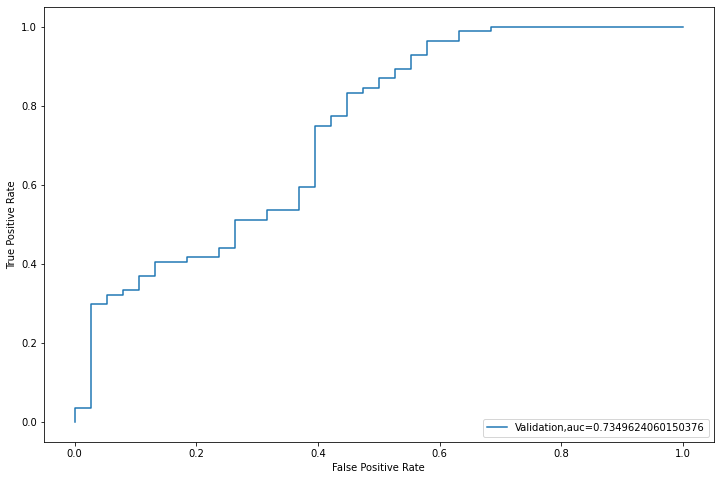

In [116]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation,auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [117]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [118]:
pd.DataFrame(submission).to_csv('logistics_loan.csv')

# Feature Engineering

#Total Income = Applicant Income + Coapplicant Income
#EMI = Loan Amount/Loan Amount Term
#Balance Income = Total Income - EMI (Amount left after paying the EMI)

In [120]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

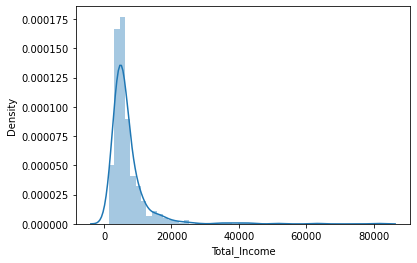

In [121]:
sns.distplot(train['Total_Income'])

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


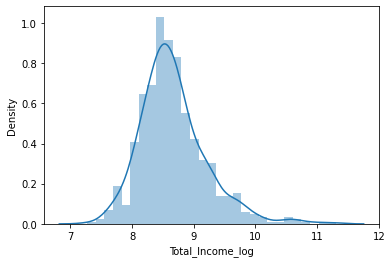

In [123]:
# Right Skewed; so we do a log transformation
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']=np.log(test['Total_Income'])

In [124]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

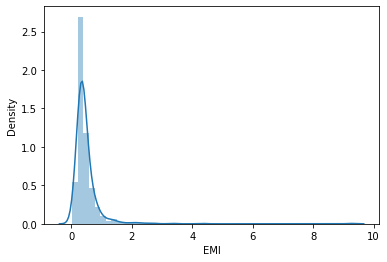

In [125]:
sns.distplot(train['EMI'])

In [128]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
#Multiplying by 1000 to make units equal

/home/kush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

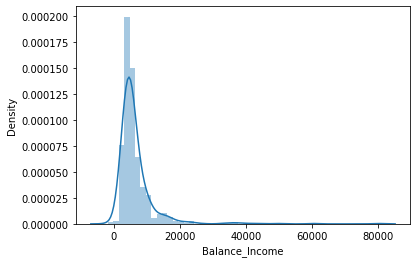

In [129]:
sns.distplot(train['Balance_Income'])

In [131]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Balance Income'],axis=1)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Balance Income'],axis=1)

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.852030,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,5720,8.651724,0.305556,5414.444444
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,4576,8.428581,0.350000,4226.000000
2,1.0,4.189655,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,6800,8.824678,0.577778,6222.222222
3,1.0,4.787492,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,4886,8.494129,0.277778,4608.222222
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,1,1,0,0,0,1,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,4.867534,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,5786,8.663196,0.313889,5472.111111
363,1.0,4.553877,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,4867,8.490233,0.319444,4547.555556
364,1.0,4.948760,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,5243,8.564649,0.350000,4893.000000
365,1.0,4.890349,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,7393,8.908289,0.438889,6954.111111
